In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('../dataset/chattahoochee_1hr_02336490.csv')

In [36]:
df

,DryBulbTemp,Precip,RelHumidity,Stationpressure,WetBulbTemp,WindSpeed,gaze_height,DATE
0,46.0,0.0,93.0,29.20,45.0,0.0,13.37,2010-01-01 00:00:00
1,46.0,0.0,93.0,29.19,45.0,0.0,13.41,2010-01-01 01:00:00
2,45.0,0.0,93.0,29.20,44.0,7.0,13.39,2010-01-01 02:00:00
3,45.0,0.0,90.0,29.19,44.0,6.0,13.37,2010-01-01 03:00:00
4,45.0,0.0,81.0,29.17,42.0,9.0,13.34,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...
125569,73.0,0.0,79.0,29.06,68.0,3.0,7.29,2024-05-27 23:00:00
125570,71.0,0.0,87.0,29.07,68.0,0.0,7.14,2024-05-28 00:00:00
125571,69.0,0.0,90.0,29.08,67.0,0.0,7.01,2024-05-28 01:00:00
125572,69.0,0.0,93.0,29.07,68.0,0.0,6.91,2024-05-28 02:00:00


In [37]:
# ARIMA Modeling

# AR (Autoregression): 
'''
    The model assumes that the current value of the series is a linear combination of its previous values.
    That's why there's regression term in the name. Note that it's a very special and important assumption and is
    a limitation+feature of the technique.
    
    Math
    
    y_t = a1 * y_t-1 + a2 * y_t-1 + ... + ap * y_t-p + e_t(error term)

    where a1, a2, ..., ap are the parameters of the model.

    p - Called the lag order, represents the number of past values the current value depends on
'''

# I (intergrated):
'''
    I component refers to the differencing of the series to make it stationary (wihout trends and seasonality).
    Differencing is a technique used to transform a non-stationary series into a stationary one by substracting
    the previous observation from the current observation.

    Math
    
    y_t' = y_t - y_t-1

    for higher orders of differencing (i.e., d > 1)
    y_t'' = y_t' - y_t-1' = (y_t - y_t-1) - (y_t-1 - y_t-2)

    The integer d denotes the number of differences needed to make the series stationary.
    we repeatedly perform this operation until series becomes stationary.

    and let the final differences to d_t -> differenced d times

    d = Degree of differencing
'''

# MA (Moving Average): 
'''
    It models the dependency between the current value and past errors. It assumes that the current value
    of the series depends linearly on the past forecast errors.
    
    Math

    y_t = e_t + b1 * e_t-1 + b2 * e_t-2 + ... + bq * e_t-q

    q = Order of moving average, indicates size of MA window
'''

# ARIMA (p,d,q) Model
'''
    The full ARIMA model combines the AR, I and MA components into a single equation
    
    d_t = a1 * d_t-1 + ... + ap * d_t-p + e_t + b1 * e_t-1 + ... + bq * e_t-q
    
    d_t = represents the differenced series after applying differecing d times
    a1, a2, ... ,ap captures the relationship with past values
    b1, b2, ... ,bq captures the relationship with past errors
'''

# Fitting an ARIMA model
'''
    objective is to find values of d, p and q
    
    we need to use techniques such as the ACF (Auto-correlation function) and the PACF (partial auto correlation
    function) plots.
    
    then estimate the parameters a and b values using Maximum Likelihood Estimation (MLE)
    
    then validate the model using diagnostics such as residual analysis
    
    Finally forecast the future values
'''

'\n    objective is to find values of d, p and q\n    \n    we need to use techniques such as the ACF (Auto-correlation function) and the PACF (partial auto correlation\n    function) plots.\n    \n    then estimate the parameters a and b values using Maximum Likelihood Estimation (MLE)\n    \n    then validate the model using diagnostics such as residual analysis\n    \n    Finally forecast the future values\n'

In [38]:
from pandas.plotting import autocorrelation_plot as acr_plot
import matplotlib.pyplot as plt

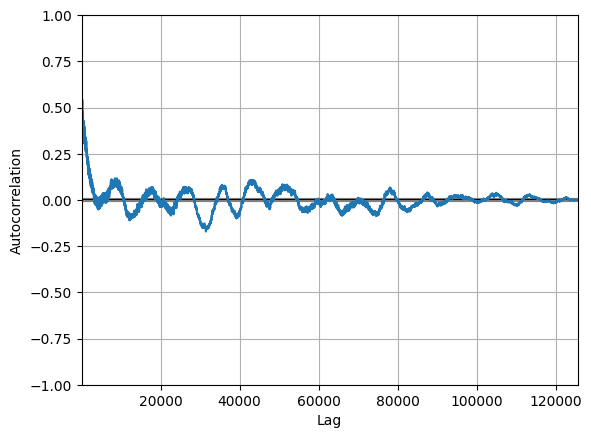

In [39]:
x = df['gaze_height']
acr_plot(x)
plt.show()

In [40]:
# Interpretation of the autocorrelation plot
'''
There's a very high correlation initially, at around lag=1, which suggests tat the series is somewhat
predictable in the short term.

The oscillating pattern suggests possible cyclical or seasonal pattern where the series has periods 
of positive and negative correlation over time.

The oscillations or cycles represent yearly trend in data. There are 13-14 cycles(peaks or troughs)
which correspond to the data being collected between 2010 - 2024.

we can observe that after about 1000 lags, the correlation is extremely low
'''

"\nThere's a very high correlation initially, at around lag=1, which suggests tat the series is somewhat\npredictable in the short term.\n\nThe oscillating pattern suggests possible cyclical or seasonal pattern where the series has periods \nof positive and negative correlation over time.\n\nThe oscillations or cycles represent yearly trend in data. There are 13-14 cycles(peaks or troughs)\nwhich correspond to the data being collected between 2010 - 2024.\n\nwe can observe that after about 1000 lags, the correlation is extremely low\n"

In [41]:
# Let's fit an ARIMA model and plot residual errors

from statsmodels.tsa.arima.model import ARIMA

In [42]:
train = x
model = ARIMA(train, order=(13,5,5)) #lag p=1000; difference d=1; error dependency q=0 

In [43]:
model_fit = model.fit()

/Users/cuser/Documents/cybertraining/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cuser/Documents/cybertraining/venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            gaze_height   No. Observations:               125574
Model:                ARIMA(13, 5, 5)   Log Likelihood               32584.138
Date:                Tue, 03 Sep 2024   AIC                         -65130.276
Time:                        12:01:40   BIC                         -64945.205
Sample:                             0   HQIC                        -65074.680
                             - 125574                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.3198      0.112    -29.677      0.000      -3.539      -3.101
ar.L2         -4.8141      0.262    -18.405      0.000      -5.327      -4.301
ar.L3         -4.8180      0.282    -17.112      0.0

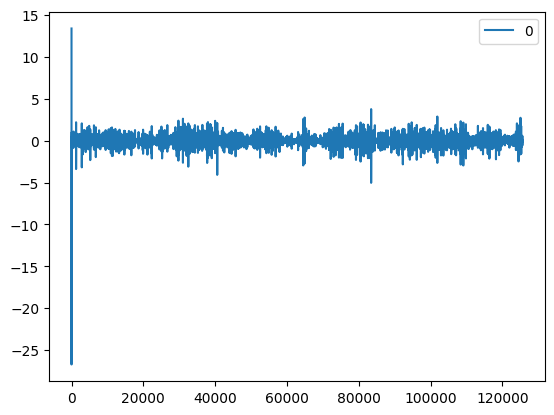

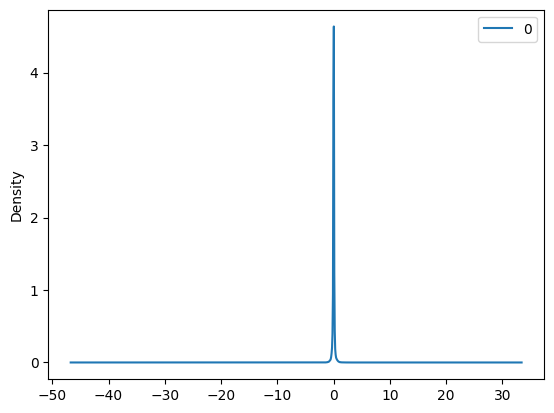

                   0
count  125574.000000
mean       -0.000016
std         0.208298
min       -26.700001
25%        -0.047130
50%         0.001268
75%         0.049353
max        13.370000


In [44]:
#summary of fit model
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind = 'kde')
plt.show()
print(residuals.describe())

In [45]:
'''
The first graph is a line plot of the residual erros, suggesting that
there's not much trend in information after a big spike in the begining

The second graph is a density plot of the residual error values, suggesting
the errors are Gaussian with mean close to zero.
'''

"\nThe first graph is a line plot of the residual erros, suggesting that\nthere's not much trend in information after a big spike in the begining\n\nThe second graph is a density plot of the residual error values, suggesting\nthe errors are Gaussian with mean close to zero.\n"

Test RMSE: 0.107


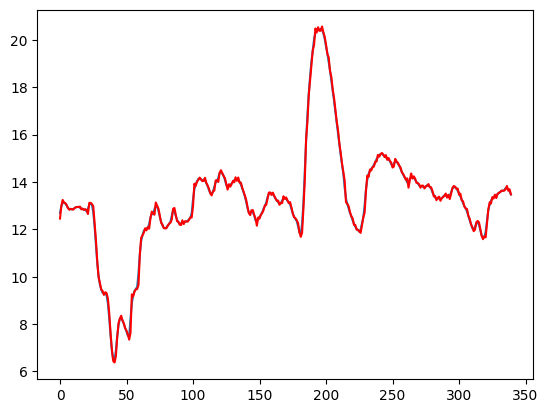

In [47]:
# evaluate an ARIMA model using a walk-forward validation.
# this looks more like a simulation than a prediction, it's slow though very slow.
# there should be a better way to do this.
# it's basically fiting model everytime new observation is made and making prediction for next hour
# it's using all previous values for fitting data which makes it very slow


from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset

    
series = read_csv('../dataset/chattahoochee_1hr_02336490.csv', usecols=['DATE', 'gaze_height'], header=0, index_col='DATE')[:1000]
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts


rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

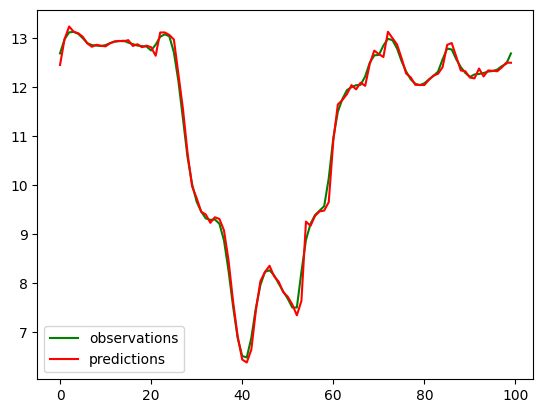

In [48]:
x = range(len(test))
pyplot.plot( test[:100], color='green', label='observations')
pyplot.plot(predictions[:100], color='red', linestyle='-', label='predictions')
pyplot.legend()
pyplot.show()


In [49]:
from datetime import datetime
d = datetime.now()
datetime.strptime(df['DATE'][5][:13], '%Y-%m-%d %H')

datetime.datetime(2010, 1, 1, 5, 0)

In [50]:
import numpy as np

epsilon = np.finfo(float).eps

def Wape(y, y_pred):
    """Weighted Average Percentage Error metric in the interval [0; 100]"""
    nominator = np.sum(np.abs(np.subtract(y, y_pred)))
    denominator = np.add(np.sum(np.abs(y)), epsilon)
    wape = np.divide(nominator, denominator)*100.0
    return wape

def nse(y, y_pred):
    return (1-(np.sum((y_pred-y)**2)/np.sum((y-np.mean(y))**2)))

In [51]:
wape = Wape(test.flatten(), predictions)
nsee = nse(test.flatten(), predictions)
print(f'WAPE: {wape}, Nse: {nsee}')

WAPE: 0.5667721924766069, Nse: 0.9978496374459631


In [67]:
def parse_datetime(date_str):
    # Parse the full datetime string including hours, minutes, seconds, and microseconds
    full_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    
    # Zero out the minutes, seconds, and microseconds
    adjusted_date = full_date.replace(minute=0, second=0, microsecond=0)
    
    return adjusted_date

parse_datetime(str(d))

datetime.datetime(2024, 8, 20, 16, 0)

In [70]:
df['DATE'][df['DATE']=='13.37']

Series([], Name: DATE, dtype: object)

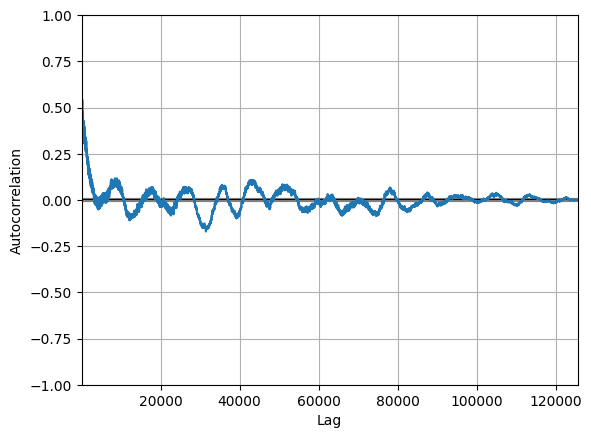

(125573,)


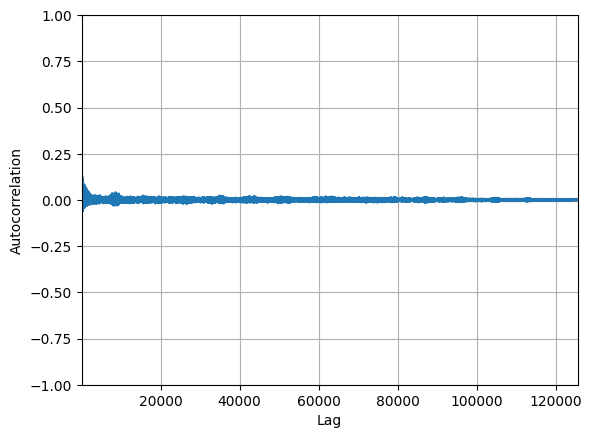

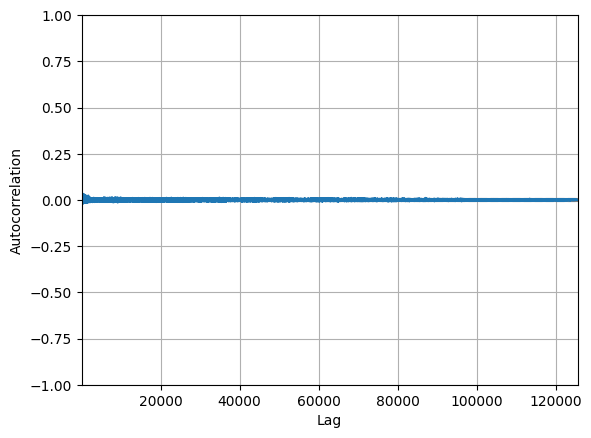

In [99]:
y = np.array(df['gaze_height']).flatten()
acr_plot(y)
plt.show()
first_diff = difference(y)
print(first_diff.shape)
acr_plot(first_diff)
plt.show()
second_diff = difference(first_diff)
acr_plot(second_diff)
plt.show()

In [90]:
def difference(series):
    new_series = []
    prev = series[0]
    for nextv in series[1:]:
        new_series.append(nextv-prev)
        prev = nextv
    return np.array(new_series)

In [82]:
(y[1] - y[0])[0]

np.float64(0.040000000000000924)

In [83]:
y.shape

(125574, 1)

In [84]:
first_diff.shape

NameError: name 'first_diff' is not defined

In [98]:
np.array(y).flatten().shape

(125574,)

In [ ]:
# limitations of arima modeling
'''
It's good when we have less data.
Doesn't capture information from large amount of data.
Forecasting is slow.
'''